In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import math
import scipy.fft as fft
from functools import partial
from scipy import signal
%matplotlib inline

In [2]:
#plt.rcParams['figure.figsize'] = [11, 13]
#plt.rcParams['figure.dpi'] = 100

In [3]:
def showPlots(plots):
    colors = ['#06d6a0', '#277da1', '#ee6c4d','#5a189a','#f3722c']
    plotCount = 0
    
    for i in range(len(plots)):
        if 'same' not in plots[i] or plots[i]['same'] == False:
            plotCount+=1
            
    fig, axs = plt.subplots(plotCount)
    pid = 0
    for i in range(len(plots)):
        if 'same' in plots[i] and plots[i]['same'] == True and pid > 0:
            pid -= 1            
        if 'x' not in plots[i]:
            axs[pid].plot(plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])
        else:
            axs[pid].plot(plots[i]['x'][:len(plots[i]['data'])], plots[i]['data'], label = plots[i]['label'], color = colors[i%len(colors)])
        axs[pid].grid()
        axs[pid].legend(loc = 'upper right')
        
        pid+=1

In [94]:
x_step = 0.1 #x-step
t_step = 0.01 #time step
max_x = 0.4
max_t = 0.4

w = int(max_x/x_step)
h = int(max_t/t_step)

T1 = 10
T2 = 10
T0 = 0.5

temperatures = []
for i in range(h):
    new = []
    for j in range(w):
        new.append(0)
    temperatures.append(new)

for i in range(h):
    temperatures[i][0] = T1 + (T2-T1)*(i/(h-1))
temperatures[0][w-1] = T0

In [95]:
temperatures

[[10.0, 0, 0, 0.5],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0]]

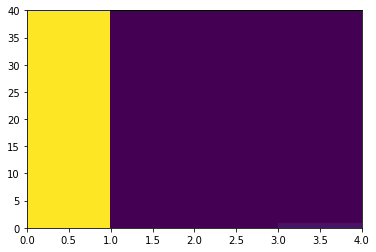

In [96]:
plt.pcolormesh(temperatures)
#print(temperatures[3][0])

In [97]:
visited = []
for i in range(h):
    new = []
    for j in range(w):
        new.append(0)
    visited.append(new)

def getRaw(x, t):
    #print(str(x)+" "+str(t))
    if x < 0 or x >= w or t < 0 or t >= h:
        return T0
    return temperatures[t][x]
def getTemp(x, t):
    #return (x_step**2)/t_step*(getRawTemp(x-1, t+1)-getRawTemp(x-1, t))+2*getRawTemp(x-1, t)-getRawTemp(x-2, t)
    return t_step/(x_step**2)*(getRaw(x+1, t-1)-2*getRaw(x, t-1)+getRaw(x-1, t-1))+getRaw(x, t-1)

In [98]:
getTemp(1,0)

0.5

In [99]:
for i in range(0, w):
    temperatures[0][i] = (T0-T1)/(w-1)*i+T1
#for i in range(1, w-1):#x
#    for j in range(1, h):#t
#        temperatures[j][i] = getTemp(i,j)

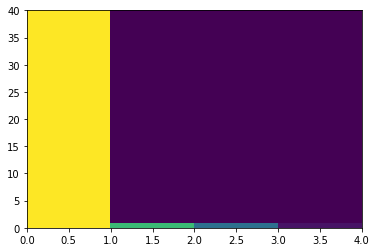

In [100]:
plt.pcolormesh(temperatures)

In [101]:
temperatures

[[10.0, 6.833333333333334, 3.666666666666667, 0.5],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0],
 [10.0, 0, 0, 0]]